# Deep learning regression model with admissions data

From kaggle:https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data

Create a neural network model to perform a regression analysis on the admission data.

**Content**
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

2024-04-26 09:46:36.978240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 09:46:36.978430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 09:46:37.182200: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
data = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# Prepare features and labels
features = data.iloc[:, 0:-1]
labels = data.iloc[:, -1] #chance of Admit

In [7]:
# Split data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=23)

In [8]:
# There are many different scales being used. 
# For example, the GRE Score is out of 340 while the University Rating is out of 5. 
# Data normalisation: scale features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [9]:
# Define the neural network model
model = Sequential([
    InputLayer(shape=(features.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [12]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
# Fit the model
model.fit(features_train_scaled, labels_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2494 - mae: 0.3301 - val_loss: 0.0444 - val_mae: 0.1564
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0218 - mae: 0.1061 - val_loss: 0.0090 - val_mae: 0.0800
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - mae: 0.0709 - val_loss: 0.0095 - val_mae: 0.0787
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - mae: 0.0690 - val_loss: 0.0057 - val_mae: 0.0598
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063 - mae: 0.0612 - val_loss: 0.0056 - val_mae: 0.0581
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0056 - mae: 0.0576 - val_loss: 0.0049 - val_mae: 0.0523
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - mae: 0.0549 - val_loss: 0.0049 - val_mae: 0.0526
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0039 - mae: 0.0472 - val_loss: 0.0054 - val_mae: 0.0568
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [14]:
# Evaluate the model
# mse and mae, the closer the result to 0 the better
mse, mae = model.evaluate(features_test_scaled, labels_test, verbose=0)
print("Mean Squared Error:", mse, "Mean Absolute Error:", mae)

Mean Squared Error: 0.00401826249435544 Mean Absolute Error: 0.04612528905272484


In [15]:
# rmse, the closer the result to 0 the better
rmse = np.sqrt(mean_squared_error(labels_test, model.predict(features_test_scaled)))
print("Root Mean Squared Error:", rmse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Root Mean Squared Error: 0.06338976666976286


In [16]:
# R2 score, result closer to 1 suggests a well-fit regression model.
r2 = r2_score(labels_test, model.predict(features_test_scaled))
print("R2 Score:", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R2 Score: 0.7828276117112489


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


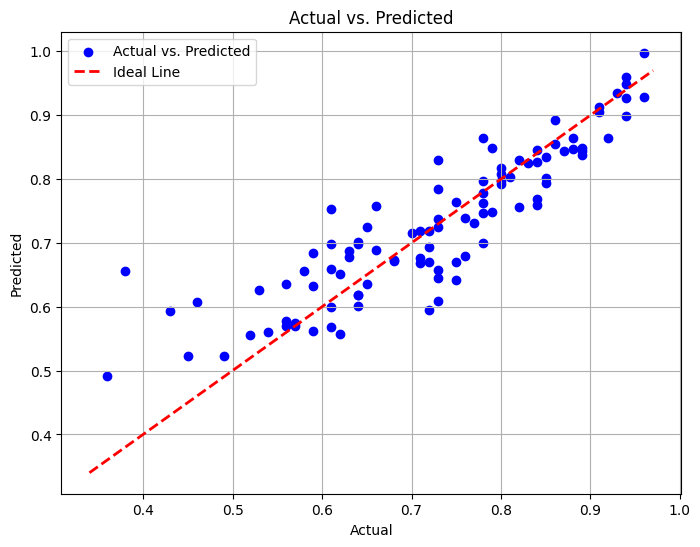

In [17]:
# Actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(labels_test, model.predict(features_test_scaled), color='blue', label='Actual vs. Predicted')
plt.plot([labels.min(), labels.max()], [labels.min(), labels.max()], color='red', linestyle='--', lw=2, label='Ideal Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

Overall, the model seems to perform reasonably well, with relatively low errors (MSE, MAE, RMSE) and a decent R2 score, suggesting that it captures a significant portion of the variance in the target variable. 

However, future steps would involve comparing these results to the performance of alternative models.